

# Lab08: Filtering and Convolution



In [48]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [49]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 8.1

Что случится, если при увеличении ширины гауссова окна std не увеличивать число элементов в окне M?

In [50]:
from thinkdsp import SquareSignal

def zero_pad(array, n):
    """Extends an array with zeros.

    array: NumPy array
    n: length of result

    returns: new NumPy array
    """
    res = np.zeros(n)
    res[:len(array)] = array
    return res


def plot_filter(M=11, std=2):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1, framerate=44100)
    spectrum = wave.make_spectrum()

    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    ys = np.convolve(wave.ys, gaussian, mode='same')
    smooth =  Wave(ys, framerate=wave.framerate)
    spectrum2 = smooth.make_spectrum()

    # plot the ratio of the original and smoothed spectrum
    amps = spectrum.amps
    amps2 = spectrum2.amps
    ratio = amps2 / amps    
    ratio[amps<560] = 0

    # plot the same ratio along with the FFT of the window
    padded =  zero_pad(gaussian, len(wave))
    dft_gaussian = np.fft.rfft(padded)

    plt.plot(np.abs(dft_gaussian), color='gray', label='Gaussian filter')
    plt.plot(ratio, label='amplitude ratio')

    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude ratio')
    plt.show()

In [51]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from thinkdsp import Wave
import scipy.signal

slider = widgets.IntSlider(min=2, max=100, value=11)
slider2 = widgets.FloatSlider(min=0, max=20, value=2)
interact(plot_filter, M=slider, std=slider2);

interactive(children=(IntSlider(value=11, description='M', min=2), FloatSlider(value=2.0, description='std', m…

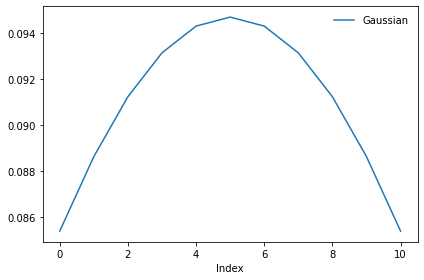

In [52]:
gaussian = scipy.signal.gaussian(M=11, std=11)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

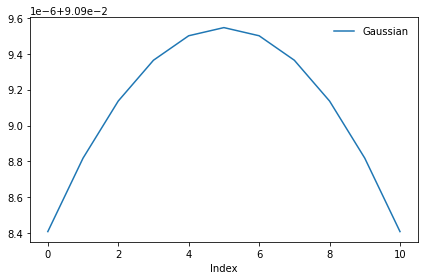

In [53]:
gaussian = scipy.signal.gaussian(M=11, std=1000)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

При увеличении std, кривая становится шире, а сам БПФ меньше.

## Exercise 8.2

Что происходит с преобразованием Фурье, если меняется std гауссовой кривой?

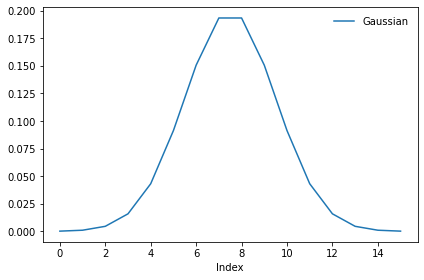

In [54]:
gaussian = scipy.signal.gaussian(M=16, std=2)
gaussian /= sum(gaussian)

plt.plot(gaussian, label='Gaussian')
decorate(xlabel='Index')

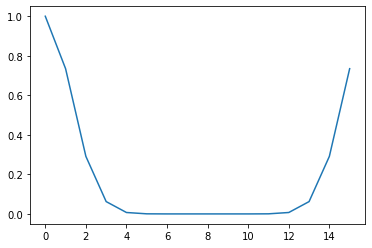

In [55]:
gaussian_fft = np.fft.fft(gaussian)
plt.plot(abs(gaussian_fft), label='Gaussian')

Сделаем свёртку:

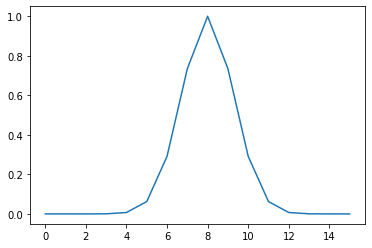

In [56]:
gaussian_fft_rolled = np.roll(gaussian_fft, len(gaussian) // 2)
plt.plot(abs(gaussian_fft_rolled), label='Gaussian')

Если std гауссовой кривой увеличивается, то преобразование Фурье становится уже.

## Exercise 8.3

Поработать с разными окнами. Какое из них лучше подходит для филтра НЧ?

Возьмём примеры из моего решения третьей главы:

In [57]:
from thinkdsp import Sinusoid
from math import pi
from thinkdsp import unbias,normalize
import numpy as np


class SawtoothSignal(Sinusoid):

  def evaluate(self,ts):
    cycles = self.freq * ts + self.offset / (pi / 2)
    frac, _ = np.modf(cycles)
    u = unbias(frac)
    high, low = abs(max(u)), abs(min(u))
    ys = self.amp * u / max(high,low)
    return ys

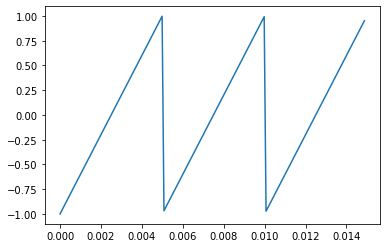

In [58]:
saw_signal = SawtoothSignal(200)
saw_signal.plot()

In [59]:
wave = saw_signal.make_wave(duration = 0.2,framerate=44000)
wave.make_audio()

In [60]:
M = 16
std = 2

g = scipy.signal.gaussian(M,std)
br = np.bartlett(M)
bl = np.blackman(M)
hm = np.hamming(M)
hn = np.hanning(M)

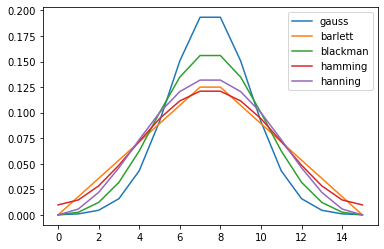

In [61]:
array  = [g,br,bl,hm,hn]
labels = ['gauss','barlett','blackman','hamming','hanning']

for elem, label in zip(array,labels):
  elem /= sum(elem)
  plt.plot(elem,label=label)
plt.legend()

Теперь дополним окно нулями и выведем ДПФ:

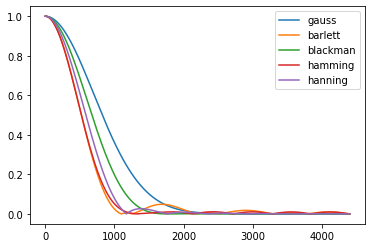

In [62]:
for elem, label in zip(array, labels):
  padded =  zero_pad(elem, len(wave))
  dft_window = np.fft.rfft(padded)
  plt.plot(abs(dft_window), label=label)
plt.legend()

Хэнинг лучше всего подоёдет для фильтрации низких частот, я так решил из-за колокльчиков.

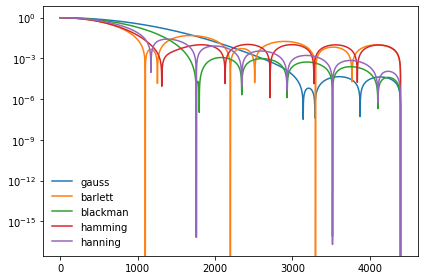

In [63]:
for elem, label in zip(array, labels):
  padded =  zero_pad(elem, len(wave))
  dft_window = np.fft.rfft(padded)
  plt.plot(abs(dft_window), label=label)
plt.legend()
decorate(yscale='log')

Смотря на логорифмический масштаб можно сделать такой же вывод.